# IEEE CIS Fraud Detection 
This is a side project I did recently on Kaggle datasets called IEEE CIS Fraud Detection. These datasets have a training set, a testing set. However, for this task, my goal is split the training set to 3 parts--a training set, a cross-validation set and a testing set. Let us start real quick!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
#import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [33]:
train_transaction = pd.read_csv(r'/Users/alex_chloe/Desktop/kaggle/train_transaction.csv')
train_identity = pd.read_csv(r'/Users/alex_chloe/Desktop/kaggle/train_identity.csv')
train_transaction_full = train_transaction.merge(train_identity, how = 'left', 
                                                 left_on = 'TransactionID', right_on = 'TransactionID')


# Knowing the data and data cleaning
We want to know some detail about the dataset, so let us do it!

In [3]:
#shape
print(train_transaction_full.shape)

(590540, 434)


In [4]:
train_transaction_full.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [34]:
train_transaction_full.describe(include = 'all')

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540,590540.000000,581607.000000,588975.000000,588963,586281.000000,...,140282,77586.000000,73289,77805,140985,140985,140985,140985,140810,118666
unique,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,4,NaN,...,130,NaN,260,4,2,2,2,2,2,1786
top,NaN,NaN,NaN,NaN,W,NaN,NaN,NaN,visa,NaN,...,chrome 63.0,NaN,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,NaN,NaN,NaN,NaN,439670,NaN,NaN,NaN,384767,NaN,...,22000,NaN,16874,60011,77814,134066,110452,73922,85165,47722
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,NaN,9898.734658,362.555488,153.194925,NaN,199.278897,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.704744e+05,0.183755,4.617224e+06,239.162522,NaN,4901.170153,157.793246,11.336444,NaN,41.244453,...,NaN,3.737502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.987000e+06,0.000000,8.640000e+04,0.251000,NaN,1000.000000,100.000000,100.000000,NaN,100.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,NaN,6019.000000,214.000000,150.000000,NaN,166.000000,...,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,NaN,9678.000000,361.000000,150.000000,NaN,226.000000,...,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,NaN,14184.000000,512.000000,150.000000,NaN,226.000000,...,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Wow, this dataset has 590540 rows and 434 columns! Based on the info provided by the IEEE, we know that 

1) Transaction tables
* TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
* TransactionAMT: transaction payment amount in USD
* ProductCD: product code, the product for each transaction
* card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
* addr: address
* dist: distance
* P_ and (R__) emaildomain: purchaser and recipient email domain
* C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual   meaning is masked.
* D1-D15: timedelta, such as days between previous transaction, etc.
* M1-M9: match, such as names on card and address, etc.
* Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features:
ProductCD
card1 - card6
addr1, addr2
Pemaildomain Remaildomain
M1 - M9

2) Identity tables

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. 
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
DeviceType
DeviceInfo
id12 - id38

As we can see a lot of missing values in the table and the categorical features are not handled, we need to do some cleaning first.


How many of the observations are fraud? I suppose this dataset may be highly skewed.

In [5]:
fraudcases, _ = train_transaction_full[train_transaction_full['isFraud'] == True].shape
nonfraudcases, _ = train_transaction_full[train_transaction_full['isFraud'] == False].shape
print("the fraud cases are {}, and the non-fraud cases are {}".format(fraudcases, nonfraudcases))

the fraud cases are 20663, and the non-fraud cases are 569877


So we need to be aware of the fact that this dataset is very skewed which could indicate accuracy is not a good criterion in our final prediction task. 

In [35]:
# drop columns that are more than 90% with NAs
#usecolumns = []
#len_rows,len_columns = train_transaction_full.shape
#for i in range(len_columns):
#    naportion = train_transaction_full.iloc[:, i].isna().sum() / len_rows
#    if(naportion <= 0.90):
#        usecolumns.append(train_transaction_full.columns[i])
train_transaction_full = train_transaction_full.loc[:, train_transaction_full.isnull().mean()<0.8]

In [36]:
train_transaction_full.columns.values

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'P_emaildomain', 'R_emaildomain', 'C1',
       'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       '

Categorical variables need to be one-hot encoded

In [37]:
column_names_cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'P_emaildomain','R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17',
       'id_19', 'id_20', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo']

However, here comes a problem. Some variables contain ridiculously large number of different levels which 
we should do one-hot encoding on. For instance, 'addr1', let's show how many different variables addr1 have

In [38]:
len(train_transaction_full['addr1'].unique())

333

As you see, this will be an issue for machine learning algorithm because if we one-hot encodes every variable like this than we wind up having a huge training set. One strategy is to drop such columns once and for all, but this may otherwise results in loss of useful info. The other solution is to just encode the first several categories by occurrences then the rest as 'other'. In this project, I chose the latter.

In [39]:
for column in column_names_cat:
    cat = train_transaction_full[train_transaction_full['isFraud'] == True].    \
                loc[:, column].value_counts(dropna = False).nlargest(n=10).index
    #if(len(cat) > 10):
    #    newcat = cat[:10]
    #else:
    #    newcat = cat
    #print(newcat)
    yesorno = [ value not in cat for value in train_transaction_full.loc[:,column]]
    train_transaction_full.loc[yesorno,column] = 'other'

Now, let us do one-hot encoding. Notice in this case, we cannot decide which variable is ordinal given the info IEEE provides. So I assume every variable is nominal. 

In [40]:
train_transaction_full_cat = train_transaction_full.loc[:, column_names_cat]
train_transaction_full_cat = pd.get_dummies(train_transaction_full_cat, dummy_na = False)

In [41]:
# sanity check
train_transaction_full_cat.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card1_2616,card1_5812,card1_6019,card1_9026,card1_9500,...,DeviceInfo_LG-D320 Build/KOT49I.V10a,DeviceInfo_MacOS,DeviceInfo_SM-A300H Build/LRX22G,DeviceInfo_Trident/7.0,DeviceInfo_Windows,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_iOS Device,DeviceInfo_other,DeviceInfo_rv:11.0,DeviceInfo_rv:57.0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now let's impute the missing values (NAs). 

In [42]:
column_names_notinterested = ['isFraud', 'TransactionID', 'TransactionDT']
column_names_noncat = [name for name in train_transaction_full.columns.tolist() 
                       if name not in column_names_cat and name not in column_names_notinterested]

In [43]:
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='median')
train_transaction_full_noncat = train_transaction_full.loc[:,column_names_noncat]

train_transaction_full_noncat = pd.DataFrame(fill_NaN.fit_transform(train_transaction_full_noncat), 
                                                 columns = train_transaction_full_noncat.columns)


Now we can concatenate the one-hot encoded cat and imputed non-cat datasets for a new dataset!

In [44]:
X_train_full = pd.concat([train_transaction_full_cat, train_transaction_full_noncat], axis = 1, sort=False)

In [45]:
print(X_train_full.shape)

(590540, 516)


merge X_train_full and y_train_full as train_full for EDA purpose!

In [74]:
train_full = pd.concat([X_train_full, train_transaction_full['isFraud']], axis = 1, sort = False)
train_full['isFraud'] = train_full['isFraud'].map({1:'Fraud',0:'Not Fraud'})

# Exploratory Data Analysis, Feature Engineering, and Selection
Let us do some exploratory data analysis to know what distribution the continuous features may follow and how they are correlated (I do think feature selection and engineering is important (except using tree-based method) but this exploratory data analysis may serve to let me know more about the data)

In [75]:
train_transaction_fraud = train_full[train_full['isFraud'] == 'Fraud']
train_transaction_nonfraud = train_full[train_full['isFraud'] == 'Not Fraud']

I want to show some distribution plots of some continuous variables to have some intuition about what they look like.

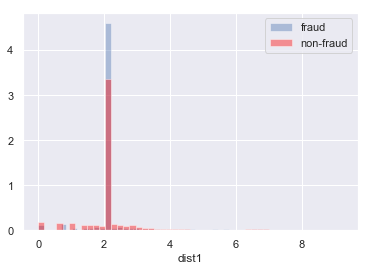

In [86]:
fig, ax = plt.subplots()
sns.distplot(np.log(train_transaction_fraud['dist1']+1), kde = False, ax = ax, norm_hist = True)
sns.distplot(np.log(train_transaction_nonfraud['dist1']+1), kde = False, color = 'red', ax = ax, norm_hist = True)
plt.legend(labels = ['fraud', 'non-fraud'])
#train_full['logdist1'] = np.log(train_full['dist1']+1)
#sns.boxplot(y = 'logdist1',x = 'isFraud', data = train_full, ax = ax)


(0, 2000)

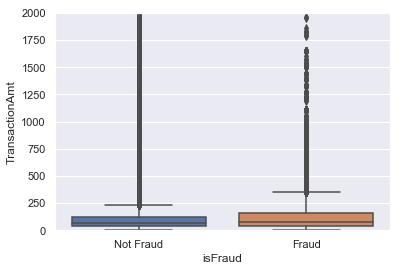

In [80]:
fig, ax = plt.subplots()
#train_full['TransactionAmt'].loc[train_full['TransactionAmt'] > 30000] = 0
sns.boxplot(y = 'TransactionAmt',x = 'isFraud', data = train_full, ax = ax)
ax.set_ylim([0, 2000])

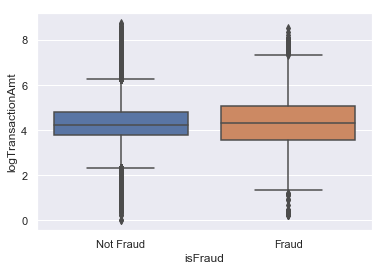

In [82]:
#logtransform
#As the data is highly skewed 
fig, ax = plt.subplots()
#sns.distplot(np.log(train_transaction_fraud['TransactionAmt']+1), kde = False, ax = ax, norm_hist = True)
#sns.distplot(np.log(train_transaction_nonfraud['TransactionAmt']+1), kde = False, 
#             color = 'red', ax = ax, norm_hist = True)
#plt.legend(labels = ['fraud', 'non-fraud'])
train_full['logTransactionAmt'] = np.log(train_full['TransactionAmt']+1)
sns.boxplot(y = 'logTransactionAmt',x = 'isFraud', data = train_full, ax = ax)

Looks like the distribution of fraud log transaction amount is broader than that of the not fraud counterpart. But such difference may not be ideal as they have a large part overlapping to each other. Let us do more anyway!

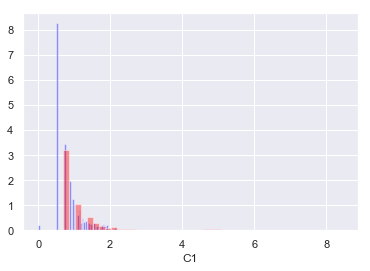

In [119]:
fig, ax = plt.subplots()
sns.distplot(np.log(train_transaction_fraud['C1']+1), kde = False, color = 'blue', ax = ax, norm_hist = True)
sns.distplot(np.log(train_transaction_nonfraud['C1']+1), kde = False, color = 'red', ax = ax, norm_hist = True)

As we see above, the log-transformed plot after normalization shows some differencesl. However, I think this is hopeless to plot all the distribution histograms manually of the columns to let us discern useful information to do feature engineering this way.

In [21]:
#correlation matrix to see which columns are highly correlated with classifications
corr_X_train = X_train_full.corr()

In [22]:
upper = corr_X_train.where(np.triu(np.ones(corr_X_train.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(np.abs(upper[column]) > 0.95)]

In [23]:
X_train_full = X_train_full.drop(columns = to_drop,axis = 1)

In [29]:
X_train_full.shape

(590540, 495)

# Train a random forest model 

In [125]:
y_train_full = train_full['isFraud'].map({'Fraud': 1,'Not Fraud': 0})

In [126]:
X_train_full.shape

(590540, 516)

I do a random forest training first because I want to evaluate the feature importance!

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


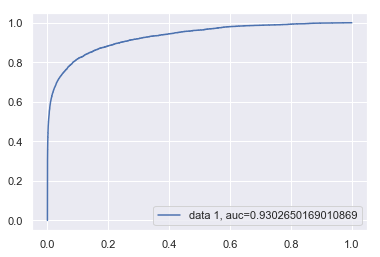

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)
clf = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_leaf = 4, 
                             random_state=0, verbose = True, n_jobs = -1)
clf.fit(X_train, y_train)  
y_pred_train = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [128]:
feature_importance = pd.Series(clf.feature_importances_, index = X_train.columns)

In [137]:
feature_importance.sort_values(ascending = False)[470:]

id_13_20.0                              7.872396e-05
card1_5812                              7.630947e-05
DeviceInfo_Trident/7.0                  7.219779e-05
DeviceInfo_rv:11.0                      6.775796e-05
R_emaildomain_outlook.es                6.417456e-05
R_emaildomain_aol.com                   6.096363e-05
V118                                    5.474057e-05
V122                                    5.248530e-05
id_17_102.0                             4.033996e-05
V117                                    3.852776e-05
card3_223.0                             2.539634e-05
id_13_24.0                              2.341692e-05
addr2_other                             2.132689e-05
card3_146.0                             1.877093e-05
V119                                    1.873664e-05
card3_106.0                             1.721516e-05
DeviceInfo_rv:57.0                      1.542471e-05
V240                                    1.405081e-05
id_17_106.0                             1.0481

In [138]:
X_train_full_mostimportant = X_train_full[feature_importance.sort_values(ascending = False).index[:400]]

In [142]:
#for i in range(3):
X_train, X_test, y_train, y_test = train_test_split(X_train_full_mostimportant, y_train_full, test_size=0.2, random_state=1)

# Grid Search
# Create the parameter grid based on the results of random search 
param_grid = {
         'bootstrap': [True],
         'max_depth': [25,30,35],
         'min_samples_leaf': [2,4],
         'min_samples_split': [2,4],
         'n_estimators': [100]
}
#Create a based model
folds = 5
rf = RandomForestClassifier(verbose = True)
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1)
#Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = skf, n_jobs = -1, verbose = 10)
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 89.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 89.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.8min finished


{'bootstrap': True,
 'max_depth': 35,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


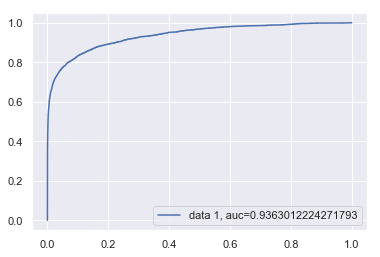

In [144]:
clf = RandomForestClassifier(n_estimators=100, max_depth=35, min_samples_split = 4,
                             random_state=0, verbose = True, n_jobs = -1)
clf.fit(X_train,y_train) 
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Train a XGboost model

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full_mostimportant, y_train_full, test_size=0.2, random_state=1)

In [145]:
clf = XGBClassifier(max_depth=10,
                    min_child_weight=1,
                    learning_rate=0.1,
                    n_estimators=300,
                    #silent=True,
                    objective='binary:logistic',
                    gamma=0,
                    max_delta_step=0,
                    subsample=1,
                    colsample_bytree=1,
                    colsample_bylevel=1,
                    reg_alpha=0,
                    reg_lambda=0,
                    scale_pos_weight=1,
                    seed=1,
                    missing=None,
                    verbosity = 2)

clf.fit(X_train, y_train)



[18:18:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 0 pruned nodes, max_depth=10
[18:18:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 698 extra nodes, 0 pruned nodes, max_depth=10
[18:19:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 716 extra nodes, 0 pruned nodes, max_depth=10
[18:19:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 780 extra nodes, 0 pruned nodes, max_depth=10
[18:19:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 882 extra nodes, 0 pruned nodes, max_depth=10
[18:20:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 808 extra nodes, 0 pruned nodes, max_depth=10
[18:20:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 866 extra nodes, 0 pruned nodes, max_depth=10
[18:20:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 902 extra nodes, 0 pruned nodes, max_depth=10
[18:21:14] INFO: src/tree/updater_prune.

[19:40:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 0 pruned nodes, max_depth=10
[19:41:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=10
[19:41:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 0 pruned nodes, max_depth=10
[19:41:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=10
[19:42:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=10
[19:42:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=10
[19:42:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=10
[19:43:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=10
[19:43:39] INFO: src/tree/updater_prune.

[20:19:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=10
[20:20:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=10
[20:20:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=10
[20:20:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=10
[20:21:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=10
[20:21:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=10
[20:21:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=10
[20:22:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 0 pruned nodes, max_depth=10
[20:22:39] INFO: src/tree/updater_prune.

[20:43:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=10
[20:43:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=10
[20:43:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[20:44:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=10
[20:44:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=10
[20:44:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=10
[20:45:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[20:45:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[20:45:49] INFO: src/tree/updater_prune.cc:7

[21:06:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=10
[21:06:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=10
[21:06:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=10
[21:07:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=10
[21:07:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=10
[21:07:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=10
[21:08:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=10
[21:08:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=10
[21:08:59] INFO: src/tree/updater_prune.c

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=0, scale_pos_weight=1, seed=1, silent=None, subsample=1,
       verbosity=2)

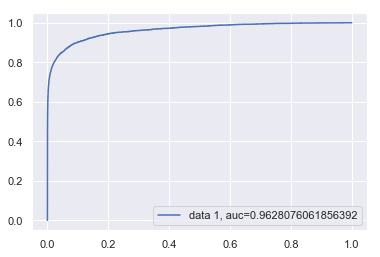

In [146]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
#print(y_test)
#print(y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [8, 10]
}


xgb = XGBClassifier(learning_rate=0.1, n_estimators=300, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb,
                                   scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1)
random_search.fit(X_train, y_train)
